In [20]:
# Dataset: https://www.kaggle.com/datasets/gauravduttakiit/wind-turbine-power-generation-forecasting
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error # Linear Regression Standard
from sklearn.metrics import mean_absolute_error # Extra metrics
from sklearn.model_selection import train_test_split


df = pd.read_excel('Train.xlsx') # 140k enteries

df['Time'] = df['Time'].astype('int64')/3600000000000 # Converts to a valid format then from nanoseconds to hours
df['WD_10m'] = df['WD_10m']/180 * np.pi # Converts to radians
df['WD_100m'] = df['WD_100m']/180 * np.pi # Converts to radians

x = df[['WS_10m', 'WS_100m', 'WG_10m', 'Time', 'WD_10m', 'WD_100m']] # First 3 all have >0.5 correlation, and time is important 🤷‍♂️
y = df['Power'] # Data has "normalized between 0 and 1"

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
# Trained on 112k rows (rounded down)
# Tested on 28k rows (rounded down)

param_grid = {
    'n_estimators': [1000],
    'learning_rate': [0.24],
    'max_depth': [9]
}

model = GridSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=3
)

model.fit(x_train, y_train)

pred = model.predict(x_test)

mae = mean_absolute_error(y_test, pred)
print(f'Mean Absolute Error: {mae}')
mse = mean_squared_error(y_test, pred)
print(f'Mean Squared Error: {mse}')

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Mean Absolute Error: 0.0904714827457416
Mean Squared Error: 0.015591585260396454


In [26]:
print(f'Best parameters: {model.best_params_}')

Best parameters: {'learning_rate': 0.24, 'max_depth': 9, 'n_estimators': 1000}


In [25]:
print(1-mae)

0.9095285172542584


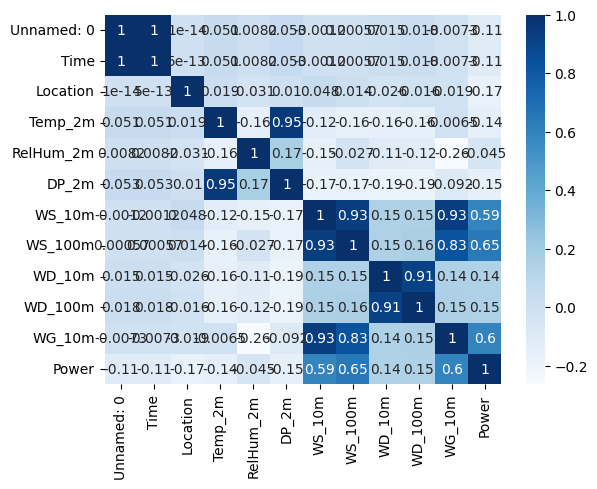

In [24]:
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.show()